In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [2]:
df= pd.read_csv("./matches_full.csv")

In [3]:
df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2024-08-17,21:30,La Liga,Matchweek 1,Sat,Away,W,2.0,1.0,...,Match Report,NaN,17.0,5.0,18.6,1.0,1,1,2025,Barcelona
1,1,2024-08-24,19:00,La Liga,Matchweek 2,Sat,Home,W,2.0,1.0,...,Match Report,NaN,13.0,5.0,16.6,0.0,0,0,2025,Barcelona
2,2,2024-08-27,21:30,La Liga,Matchweek 3,Tue,Away,W,2.0,1.0,...,Match Report,NaN,22.0,5.0,19.3,1.0,0,0,2025,Barcelona
3,3,2024-08-31,17:00,La Liga,Matchweek 4,Sat,Home,W,7.0,0.0,...,Match Report,NaN,23.0,11.0,13.7,1.0,0,0,2025,Barcelona
4,4,2024-09-15,16:15,La Liga,Matchweek 5,Sun,Away,W,4.0,1.0,...,Match Report,NaN,20.0,9.0,19.1,0.0,0,0,2025,Barcelona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,48,2020-07-05,17:00,La Liga,Matchweek 34,Sun,Home,L,0.0,1.0,...,Match Report,NaN,7.0,2.0,18.9,1.0,0,0,2020,Espanyol
4314,49,2020-07-08,22:00,La Liga,Matchweek 35,Wed,Away,L,0.0,1.0,...,Match Report,NaN,11.0,2.0,18.1,1.0,0,0,2020,Espanyol
4315,50,2020-07-12,14:00,La Liga,Matchweek 36,Sun,Home,L,0.0,2.0,...,Match Report,NaN,14.0,3.0,20.8,3.0,0,0,2020,Espanyol
4316,51,2020-07-16,21:00,La Liga,Matchweek 37,Thu,Away,L,0.0,1.0,...,Match Report,NaN,18.0,6.0,21.3,3.0,0,0,2020,Espanyol


In [4]:
df.isnull().sum()

Unnamed: 0          0
date                0
time                0
comp                0
round               0
day                 0
venue               0
result              0
gf                  0
ga                  0
opponent            0
xg                  0
xga                 0
poss                0
attendance        974
captain             0
formation           0
opp formation       0
referee            54
match report        0
notes            4318
sh                  0
sot                 0
dist                3
fk                  0
pk                  0
pkatt               0
season              0
team                0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4318.0,21.691524,13.893162,0.0,9.0,21.0,33.0,58.0
gf,4318.0,1.270032,1.168970,0.0,0.0,1.0,2.0,7.0
ga,4318.0,1.270032,1.168970,0.0,0.0,1.0,2.0,7.0
xg,4318.0,1.262112,0.774208,0.0,0.7,1.1,1.7,5.9
xga,4318.0,1.262112,0.774208,0.0,0.7,1.1,1.7,5.9
poss,4318.0,50.001158,11.435318,18.0,42.0,50.0,58.0,82.0
attendance,3344.0,27864.883373,18103.653603,13.0,14195.0,20123.0,39611.5,95745.0
notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sh,4318.0,11.512043,4.838242,0.0,8.0,11.0,14.0,36.0
sot,4318.0,3.785086,2.288167,0.0,2.0,3.0,5.0,17.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4318 non-null   int64  
 1   date           4318 non-null   object 
 2   time           4318 non-null   object 
 3   comp           4318 non-null   object 
 4   round          4318 non-null   object 
 5   day            4318 non-null   object 
 6   venue          4318 non-null   object 
 7   result         4318 non-null   object 
 8   gf             4318 non-null   float64
 9   ga             4318 non-null   float64
 10  opponent       4318 non-null   object 
 11  xg             4318 non-null   float64
 12  xga            4318 non-null   float64
 13  poss           4318 non-null   float64
 14  attendance     3344 non-null   float64
 15  captain        4318 non-null   object 
 16  formation      4318 non-null   object 
 17  opp formation  4318 non-null   object 
 18  referee 

In [7]:
print(f"Shape: {df.shape}")


Shape: (4318, 29)


In [8]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])


# Analysis

In [9]:
# Team performance analysis
print("\n=== Team Performance Analysis ===")
team_stats = df.groupby('team').agg({
    'result': lambda x: (x == 'W').sum(),
    'gf': 'sum',
    'ga': 'sum',
    'xg': 'mean',
    'xga': 'mean',
    'poss': 'mean',
    'sh': 'mean',
    'sot': 'mean'
}).rename(columns={'result': 'wins'})
team_stats['losses'] = df.groupby('team')['result'].apply(lambda x: (x == 'L').sum())
team_stats['draws'] = df.groupby('team')['result'].apply(lambda x: (x == 'D').sum())
team_stats['total_matches'] = team_stats['wins'] + team_stats['losses'] + team_stats['draws']
team_stats['win_rate'] = (team_stats['wins'] / team_stats['total_matches'] * 100).round(1)
team_stats['goal_diff'] = team_stats['gf'] - team_stats['ga']
team_stats = team_stats.sort_values('win_rate', ascending=False)
print(team_stats)



=== Team Performance Analysis ===
                 wins     gf     ga        xg       xga       poss         sh  \
team                                                                            
Real Madrid       146  434.0  171.0  1.836111  0.997222  59.819444  15.671296   
Barcelona         142  459.0  203.0  1.943056  1.007407  65.162037  14.689815   
Atletico Madrid   128  366.0  187.0  1.533333  0.957407  50.726852  12.412037   
Girona             47  177.0  140.0  1.488235  1.403922  54.843137  11.637255   
Real Sociedad      97  280.0  224.0  1.330556  1.043056  55.000000  11.379630   
Villarreal         94  358.0  270.0  1.605581  1.258605  53.600000  12.260465   
Sevilla            92  286.0  241.0  1.249074  1.173611  55.736111  12.236111   
Real Betis         87  288.0  269.0  1.327778  1.289352  52.763889  12.305556   
Athletic Club      84  282.0  219.0  1.301852  1.052315  49.550926  12.097222   
Osasuna            70  234.0  288.0  1.079630  1.274537  46.606481  11.037

In [10]:


# Match result distribution
print("\n=== Match Result Distribution ===")
result_dist = df['result'].value_counts(normalize=True) * 100
print(result_dist)


=== Match Result Distribution ===
result
W    36.26679
L    36.26679
D    27.46642
Name: proportion, dtype: float64


In [11]:
# Home vs Away performance
print("\n=== Home vs Away Performance ===")
venue_stats = df.groupby('venue').agg({
    'result': lambda x: (x == 'W').mean() * 100,
    'gf': 'mean',
    'ga': 'mean',
    'xg': 'mean',
    'xga': 'mean'
}).rename(columns={'result': 'win_percentage'})
print(venue_stats)


=== Home vs Away Performance ===
       win_percentage        gf        ga        xg       xga
venue                                                        
Away        27.929597  1.100509  1.439555  1.096109  1.428115
Home        44.603983  1.439555  1.100509  1.428115  1.096109


In [12]:
# Formation analysis
print("\n=== Formation Analysis ===")
formation_stats = df.groupby('formation').agg({
    'result': lambda x: (x == 'W').mean() * 100,
    'gf': 'mean',
    'ga': 'mean',
    'xg': 'mean',
    'xga': 'mean'
}).rename(columns={'result': 'win_percentage'}).sort_values('win_percentage', ascending=False)
print(formation_stats.head(10))



=== Formation Analysis ===
            win_percentage        gf        ga        xg       xga
formation                                                         
3-2-4-1         100.000000  4.000000  1.000000  2.100000  0.800000
4-3-1-2          63.333333  1.866667  0.866667  1.953333  0.960000
4-1-2-1-2◆       58.823529  1.617647  1.088235  1.573529  1.070588
4-3-2-1          50.000000  1.000000  1.000000  0.800000  0.800000
4-2-2-2          50.000000  1.428571  0.785714  1.435714  1.121429
3-4-3◆           50.000000  2.000000  2.000000  1.800000  0.950000
4-3-3            48.082192  1.552055  1.071233  1.515753  1.106575
3-4-3            42.105263  1.357895  1.221053  1.276842  1.178421
3-1-4-2          37.500000  1.196429  1.250000  1.221429  1.085714
4-2-3-1          36.084453  1.251440  1.270633  1.241555  1.258349


In [13]:
# Time analysis
print("\n=== Time Analysis ===")
time_stats = df.groupby('time').agg({
    'result': lambda x: (x == 'W').mean() * 100,
    'gf': 'mean',
    'ga': 'mean'
}).rename(columns={'result': 'win_percentage'}).sort_values('win_percentage', ascending=False)
print(time_stats)


=== Time Analysis ===
       win_percentage        gf        ga
time                                     
21:15       50.000000  2.000000  2.000000
22:15       50.000000  1.500000  1.500000
13:00       46.666667  1.133333  1.133333
12:00       42.000000  1.200000  1.200000
22:00       37.912088  1.291209  1.291209
19:30       37.500000  1.171875  1.171875
18:00       37.500000  1.062500  1.062500
15:15       37.500000  1.000000  1.000000
17:00       37.500000  1.166667  1.166667
20:00       36.956522  1.130435  1.130435
16:15       36.590038  1.306513  1.306513
21:00       36.473430  1.294686  1.294686
17:30       36.363636  1.113636  1.113636
14:00       35.739437  1.323944  1.323944
16:00       35.714286  1.357143  1.357143
18:30       35.269122  1.211048  1.211048
21:30       34.931507  1.363014  1.363014
19:00       34.400000  1.284000  1.284000
19:45       33.333333  1.000000  1.000000
20:30       25.000000  1.333333  1.333333
19:15       23.076923  0.807692  0.807692


In [14]:
# Day of week analysis
print("\n=== Day of Week Analysis ===")
day_stats = df.groupby('day').agg({
    'result': lambda x: (x == 'W').mean() * 100,
    'gf': 'mean',
    'ga': 'mean'
}).rename(columns={'result': 'win_percentage'}).sort_values('win_percentage', ascending=False)
print(day_stats)


=== Day of Week Analysis ===
     win_percentage        gf        ga
day                                    
Thu       38.775510  1.301020  1.301020
Wed       36.821705  1.170543  1.170543
Sat       36.789773  1.258523  1.258523
Sun       36.223862  1.301968  1.301968
Fri       35.945946  1.205405  1.205405
Mon       33.802817  1.214789  1.214789
Tue       33.522727  1.403409  1.403409


In [15]:
# Top performing teams by xG
print("\n=== Top Teams by Expected Goals (xG) ===")
top_xg_teams = df.groupby('team')['xg'].mean().sort_values(ascending=False)
print(top_xg_teams.head(10))

# Top performing teams by xGA
print("\n=== Top Teams by Expected Goals Against (xGA) ===")
top_xga_teams = df.groupby('team')['xga'].mean().sort_values()
print(top_xga_teams.head(10))



=== Top Teams by Expected Goals (xG) ===
team
Barcelona          1.943056
Real Madrid        1.836111
Villarreal         1.605581
Atletico Madrid    1.533333
Girona             1.488235
Real Sociedad      1.330556
Real Betis         1.327778
Athletic Club      1.301852
Levante            1.261404
Sevilla            1.249074
Name: xg, dtype: float64

=== Top Teams by Expected Goals Against (xGA) ===
team
Atletico Madrid    0.957407
Real Madrid        0.997222
Barcelona          1.007407
Real Sociedad      1.043056
Athletic Club      1.052315
Getafe             1.162500
Sevilla            1.173611
Rayo Vallecano     1.240000
Celta Vigo         1.252778
Villarreal         1.258605
Name: xga, dtype: float64


In [16]:
# Referee analysis
print("\n=== Referee Analysis ===")
referee_stats = df.groupby('referee').agg({
    'result': lambda x: (x == 'W').mean() * 100,
    'gf': 'mean',
    'ga': 'mean'
}).rename(columns={'result': 'home_win_percentage'}).sort_values('home_win_percentage', ascending=False)
print(referee_stats.head(10))


=== Referee Analysis ===
                     home_win_percentage        gf        ga
referee                                                     
Alejandro Quintero             45.833333  1.291667  1.291667
Javier Alberola                41.666667  1.333333  1.333333
Antonio Matéu Lahoz            41.666667  0.863636  0.863636
Juan Pulido                    41.489362  1.393617  1.393617
Guillermo Cuadra               40.865385  1.403846  1.403846
Ricardo de Burgos              40.366972  1.412844  1.412844
Javier Estrada                 39.285714  1.297619  1.297619
Eduardo Prieto                 38.888889  1.000000  1.000000
José Luis Munuera              38.785047  1.378505  1.378505
Francisco Hernández            38.709677  1.387097  1.387097


In [17]:

# Attendance analysis
print("\n=== Attendance Analysis ===")
attendance_stats = df.groupby('team')['attendance'].mean().sort_values(ascending=False)
print(attendance_stats)



=== Attendance Analysis ===
team
Real Madrid        45332.976048
Barcelona          44962.916168
Atletico Madrid    42829.335329
Real Betis         38068.422619
Athletic Club      34616.863095
Valencia           32783.904762
Sevilla            31402.273810
Real Sociedad      29424.301205
Las Palmas         26571.328125
Valladolid         24551.439560
Espanyol           23948.554688
Osasuna            22694.694611
Celta Vigo         22128.452381
Villarreal         22058.011976
Cadiz              21640.508772
Girona             21244.627451
Almeria            21140.276316
Granada            21035.883495
Elche              20994.883117
Mallorca           20958.431138
Alaves             20540.744186
Levante            20518.153846
Getafe             19413.634731
Leganes            19379.377358
Rayo Vallecano     18766.657143
Eibar              17556.703704
Huesca                      NaN
Name: attendance, dtype: float64


In [18]:
# Shot analysis
print("\n=== Shot Analysis ===")
shot_stats = df.groupby('team').agg({
    'sh': 'mean',
    'sot': 'mean',
    'dist': 'mean'
}).sort_values('sot', ascending=False)
print(shot_stats)


=== Shot Analysis ===
                        sh       sot       dist
team                                           
Real Madrid      15.671296  5.703704  18.184722
Barcelona        14.689815  5.518519  16.838889
Atletico Madrid  12.412037  4.500000  17.083333
Villarreal       12.260465  4.339535  16.994419
Girona           11.637255  4.225490  17.215686
Almeria          12.065789  4.184211  18.539474
Real Betis       12.305556  4.074074  18.274537
Athletic Club    12.097222  3.893519  17.411111
Sevilla          12.236111  3.870370  17.654167
Rayo Vallecano   13.128571  3.857143  19.963571
Real Sociedad    11.379630  3.819444  17.567757
Celta Vigo       10.805556  3.777778  18.273611
Levante          10.771930  3.543860  18.507018
Huesca           10.631579  3.421053  18.131579
Eibar            11.342105  3.407895  18.753333
Las Palmas       10.437500  3.406250  19.776563
Espanyol         10.496403  3.287770  18.810791
Osasuna          11.037037  3.273148  18.905093
Valencia         

In [19]:
# Possession analysis
print("\n=== Possession Analysis ===")
possession_stats = df.groupby('team')['poss'].mean().sort_values(ascending=False)
print(possession_stats)



=== Possession Analysis ===
team
Barcelona          65.162037
Real Madrid        59.819444
Las Palmas         55.750000
Sevilla            55.736111
Real Sociedad      55.000000
Girona             54.843137
Villarreal         53.600000
Real Betis         52.763889
Celta Vigo         51.560185
Atletico Madrid    50.726852
Rayo Vallecano     50.228571
Athletic Club      49.550926
Levante            49.210526
Huesca             48.342105
Eibar              47.815789
Elche              47.131579
Valencia           47.129630
Osasuna            46.606481
Almeria            45.736842
Valladolid         45.635714
Espanyol           44.582734
Mallorca           44.376404
Granada            43.875000
Leganes            43.281250
Getafe             42.884259
Alaves             42.601124
Cadiz              40.335526
Name: poss, dtype: float64


In [20]:

# Captain analysis
print("\n=== Captain Analysis ===")
captain_stats = df.groupby('captain').agg({
    'result': lambda x: (x == 'W').mean() * 100,
    'gf': 'mean',
    'ga': 'mean'
}).rename(columns={'result': 'win_percentage'}).sort_values('win_percentage', ascending=False)
print(captain_stats.head(10))



=== Captain Analysis ===
                    win_percentage   gf   ga
captain                                     
Alex Baena                   100.0  2.0  1.0
Bruno Soriano                100.0  4.0  0.0
Francis Coquelin             100.0  1.0  0.0
Geoffrey Kondogbia           100.0  1.0  0.0
Federico Valverde            100.0  3.0  0.0
Juan Foyth                   100.0  1.5  0.5
Jordi Alba                   100.0  3.0  1.0
Pepe Reina                   100.0  2.0  1.0
Toni Kroos                   100.0  4.0  1.0
Yuri Berchiche               100.0  2.0  0.0


In [21]:
# Matchweek analysis
print("\n=== Matchweek Analysis ===")
matchweek_stats = df.groupby('round').agg({
    'result': lambda x: (x == 'W').mean() * 100,
    'gf': 'mean',
    'ga': 'mean'
}).rename(columns={'result': 'win_percentage'})
print(matchweek_stats)


=== Matchweek Analysis ===
              win_percentage        gf        ga
round                                           
Matchweek 1        31.666667  1.150000  1.150000
Matchweek 10       35.000000  1.391667  1.391667
Matchweek 11       31.666667  1.366667  1.366667
Matchweek 12       35.833333  1.116667  1.116667
Matchweek 13       34.166667  1.375000  1.375000
Matchweek 14       38.333333  1.316667  1.316667
Matchweek 15       31.666667  1.225000  1.225000
Matchweek 16       35.833333  1.183333  1.183333
Matchweek 17       30.000000  1.100000  1.100000
Matchweek 18       40.833333  1.450000  1.450000
Matchweek 19       37.500000  1.183333  1.183333
Matchweek 2        35.000000  1.083333  1.083333
Matchweek 20       36.666667  1.333333  1.333333
Matchweek 21       36.666667  1.208333  1.208333
Matchweek 22       36.666667  1.308333  1.308333
Matchweek 23       40.000000  1.316667  1.316667
Matchweek 24       32.500000  1.283333  1.283333
Matchweek 25       35.000000  1.308333  1

In [22]:
# Season analysis (though all data is from 2025 season)
print("\n=== Season Analysis ===")
season_stats = df.groupby('season').agg({
    'result': lambda x: (x == 'W').mean() * 100,
    'gf': 'mean',
    'ga': 'mean'
}).rename(columns={'result': 'win_percentage'})
print(season_stats)


=== Season Analysis ===
        win_percentage        gf        ga
season                                    
2020         36.184211  1.239474  1.239474
2021         35.657895  1.253947  1.253947
2022         35.394737  1.251316  1.251316
2023         38.289474  1.256579  1.256579
2024         35.921053  1.322368  1.322368
2025         36.100386  1.308880  1.308880


# EDA

In [23]:
# Create a results count by team
results_by_team = df.groupby(['team', 'result']).size().unstack().fillna(0)
results_by_team['total'] = results_by_team.sum(axis=1)
results_by_team = results_by_team.sort_values('total', ascending=False)

fig = px.bar(results_by_team, x=results_by_team.index, y=['W', 'D', 'L'], 
             title='Match Results by Team (2024-2025 Season)',
             labels={'value': 'Number of Matches', 'team': 'Team', 'variable': 'Result'},
             color_discrete_map={'W': 'green', 'D': 'blue', 'L': 'red'})
fig.update_layout(barmode='stack')
fig.show()

c:\Users\Techno Shield\anaconda3\envs\neww\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [24]:
top_teams = ['Barcelona', 'Real Madrid', 'Atletico Madrid', 'Athletic Club', 'Real Sociedad']

# Calculate goals for and against
goals_stats = df.groupby('team').agg({'gf': 'sum', 'ga': 'sum'}).reset_index()
goals_stats = goals_stats[goals_stats['team'].isin(top_teams)]

fig = go.Figure()
fig.add_trace(go.Bar(x=goals_stats['team'], y=goals_stats['gf'], name='Goals Scored', marker_color='blue'))
fig.add_trace(go.Bar(x=goals_stats['team'], y=goals_stats['ga'], name='Goals Conceded', marker_color='red'))

fig.update_layout(title='Goals Scored vs Conceded by Top Teams',
                  xaxis_title='Team',
                  yaxis_title='Number of Goals',
                  barmode='group')
fig.show()

In [25]:
home_away = df.groupby(['team', 'venue']).agg({'gf': 'mean', 'ga': 'mean'}).unstack()
home_away.columns = ['_'.join(col).strip() for col in home_away.columns.values]
home_away = home_away.reset_index()

fig = make_subplots(rows=1, cols=2, subplot_titles=('Goals Scored', 'Goals Conceded'))

fig.add_trace(go.Bar(x=home_away['team'], y=home_away['gf_Home'], name='Home Goals', marker_color='blue'), row=1, col=1)
fig.add_trace(go.Bar(x=home_away['team'], y=home_away['gf_Away'], name='Away Goals', marker_color='lightblue'), row=1, col=1)

fig.add_trace(go.Bar(x=home_away['team'], y=home_away['ga_Home'], name='Home Conceded', marker_color='red'), row=1, col=2)
fig.add_trace(go.Bar(x=home_away['team'], y=home_away['ga_Away'], name='Away Conceded', marker_color='pink'), row=1, col=2)

fig.update_layout(title='Home vs Away Performance (Average Goals)',
                  showlegend=True)
fig.show()

In [26]:
# Calculate points
def calculate_points(row):
    if row['result'] == 'W':
        return 3
    elif row['result'] == 'D':
        return 1
    else:
        return 0

df['points'] = df.apply(calculate_points, axis=1)
points_possession = df.groupby('team').agg({'points': 'sum', 'poss': 'mean'}).reset_index()

fig = px.scatter(points_possession, x='poss', y='points', color='team',
                 title='Possession vs Points Correlation',
                 labels={'poss': 'Average Possession (%)', 'points': 'Total Points'},
                 hover_name='team', size_max=60)
fig.update_traces(marker=dict(size=12))
fig.show()

c:\Users\Techno Shield\anaconda3\envs\neww\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [27]:
xg_comparison = df.groupby('team').agg({'xg': 'sum', 'gf': 'sum'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=xg_comparison['team'], y=xg_comparison['xg'], 
                        mode='lines+markers', name='Expected Goals (xG)'))
fig.add_trace(go.Scatter(x=xg_comparison['team'], y=xg_comparison['gf'], 
                        mode='lines+markers', name='Actual Goals'))

fig.update_layout(title='Expected Goals (xG) vs Actual Goals by Team',
                  xaxis_title='Team',
                  yaxis_title='Goals',
                  hovermode='x unified')
fig.show()

In [28]:
formation_analysis = df.groupby(['team', 'formation']).size().reset_index(name='count')
formation_analysis = formation_analysis.sort_values('count', ascending=False)

fig = px.bar(formation_analysis, x='formation', y='count', color='team',
             title='Most Used Formations by Team',
             labels={'formation': 'Formation', 'count': 'Number of Matches'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

c:\Users\Techno Shield\anaconda3\envs\neww\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [29]:
# Basic data cleaning
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()

In [30]:
monthly_performance = df.groupby(['team', 'month']).agg({'points': 'sum'}).reset_index()

fig = px.line(monthly_performance, x='month', y='points', color='team',
              title='Monthly Points Accumulation by Team',
              labels={'month': 'Month', 'points': 'Points Earned'})
fig.update_xaxes(tickvals=list(range(1,13)), ticktext=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
fig.show()

c:\Users\Techno Shield\anaconda3\envs\neww\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [31]:
shot_efficiency = df.groupby('team').agg({'sh': 'sum', 'sot': 'sum'}).reset_index()
shot_efficiency['conversion_rate'] = (shot_efficiency['sot'] / shot_efficiency['sh']) * 100

fig = make_subplots(rows=1, cols=2, subplot_titles=('Total Shots', 'Shot Conversion Rate'))

fig.add_trace(go.Bar(x=shot_efficiency['team'], y=shot_efficiency['sh'], name='Total Shots'), row=1, col=1)
fig.add_trace(go.Bar(x=shot_efficiency['team'], y=shot_efficiency['conversion_rate'], name='Conversion Rate (%)'), row=1, col=2)

fig.update_layout(title='Shot Efficiency by Team',
                  showlegend=False)
fig.show()

In [32]:
df['goal_difference'] = df['gf'] - df['ga']


In [33]:
# Create a pivot table of results by team and matchweek
results_pivot = df.pivot_table(index='team', columns='round', values='result', aggfunc='first')

# Convert results to numerical values (Win=3, Draw=1, Loss=0)
results_numeric = results_pivot.replace({'W': 3, 'D': 1, 'L': 0})

fig = px.imshow(results_numeric,
                labels=dict(x="Matchweek", y="Team", color="Points"),
                x=results_numeric.columns,
                y=results_numeric.index,
                color_continuous_scale=['red', 'yellow', 'green'],
                title='Team Performance by Matchweek (Heatmap)')
fig.update_layout(height=800)
fig.show()

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\2603407199.py:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [34]:
# Calculate rolling metrics for top teams
top_teams = ['Barcelona', 'Real Madrid', 'Atletico Madrid']

rolling_data = []
for team in top_teams:
    team_df = df[df['team'] == team].sort_values('date')
    team_df['rolling_points'] = team_df['result'].replace({'W': 3, 'D': 1, 'L': 0}).rolling(5).mean()
    team_df['rolling_gf'] = team_df['gf'].rolling(5).mean()
    team_df['rolling_ga'] = team_df['ga'].rolling(5).mean()
    rolling_data.append(team_df)

rolling_df = pd.concat(rolling_data)

fig = make_subplots(rows=2, cols=1, subplot_titles=('5-Match Rolling Average Points', '5-Match Rolling Goal Difference'))

for team in top_teams:
    team_data = rolling_df[rolling_df['team'] == team]
    fig.add_trace(go.Scatter(x=team_data['date'], y=team_data['rolling_points'], 
                         name=f'{team} Points', mode='lines'), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=team_data['date'], y=team_data['rolling_gf'] - team_data['rolling_ga'], 
                         name=f'{team} GD', mode='lines'), row=2, col=1)

fig.update_layout(height=800, title_text='Rolling Performance Metrics for Top Teams')
fig.update_yaxes(title_text="Average Points", row=1, col=1)
fig.update_yaxes(title_text="Goal Difference", row=2, col=1)
fig.show()

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\1749724400.py:7: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\1749724400.py:7: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\1749724400.py:7: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, 

In [35]:
# Analyze referee strictness
referee_stats = df.groupby('referee').agg({
    'pk': 'sum',
    'fk': 'sum',
    'sh': 'mean',
    'match report': 'count'
}).reset_index().sort_values('pk', ascending=False).head(15)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Penalties Awarded', 'Fouls Called'))

fig.add_trace(go.Bar(x=referee_stats['referee'], y=referee_stats['pk'], 
                    name='Penalties'), row=1, col=1)
fig.add_trace(go.Bar(x=referee_stats['referee'], y=referee_stats['fk'], 
                    name='Fouls'), row=1, col=2)

fig.update_layout(height=500, title_text='Referee Strictness Analysis', showlegend=False)
fig.update_xaxes(tickangle=45)
fig.show()

In [36]:
# Analyze performance by day and time
day_time_analysis = df.groupby(['day', 'time']).agg({
    'gf': 'mean',
    'ga': 'mean',
    'sh': 'mean',
    'poss': 'mean'
}).reset_index()

fig = px.scatter(day_time_analysis, x='time', y='gf', color='day',
                 size='sh', hover_name='day',
                 title='Match Time Analysis (Size = Average Shots)',
                 labels={'time': 'Match Time', 'gf': 'Avg Goals Scored', 'day': 'Day of Week'})
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['14:00','16:15','18:30','19:00','19:15','20:00','20:30','21:00','21:30']})
fig.show()

c:\Users\Techno Shield\anaconda3\envs\neww\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [37]:
# Calculate performance metrics
team_performance = df.groupby('team').agg({
    'xg': 'sum',
    'xga': 'sum',
    'gf': 'sum',
    'ga': 'sum',
    'points': 'sum'
}).reset_index()

team_performance['xPts'] = (team_performance['xg'] * 0.6 + team_performance['xga'] * 0.2)  # Simplified xPts model
team_performance['performance'] = team_performance['points'] - team_performance['xPts']

fig = px.bar(team_performance.sort_values('performance'), 
             x='team', y='performance', color='performance',
             color_continuous_scale='RdYlGn',
             title='Actual Points vs Expected Performance',
             labels={'performance': 'Performance (Actual - Expected Points)'})
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [38]:
# Calculate offensive and defensive metrics
team_profiles = df.groupby('team').agg({
    'gf': 'mean',
    'ga': 'mean',
    'sh': 'mean',
    'sot': 'mean',
    'poss': 'mean'
}).reset_index()

fig = px.scatter(team_profiles, x='gf', y='ga', color='poss',
                 size='sh', hover_name='team',
                 title='Team Profiles: Offensive vs Defensive (Size = Avg Shots)',
                 labels={'gf': 'Avg Goals For', 'ga': 'Avg Goals Against', 'poss': 'Possession %'})
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.add_shape(type="line", x0=0, y0=0, x1=3, y1=3, line=dict(color="gray", dash="dash"))
fig.show()

In [39]:
# Calculate xG difference and match outcomes
df['xg_diff'] = df['xg'] - df['xga']
df['result_num'] = df['result'].replace({'W': 1, 'D': 0.5, 'L': 0})

# Create numeric bins for xG difference
bins = np.linspace(df['xg_diff'].min(), df['xg_diff'].max(), 15)
df['xg_diff_bin'] = pd.cut(df['xg_diff'], bins=bins)

# Calculate win probability by bin - ensuring numeric conversion
win_prob = df.groupby('xg_diff_bin')['result_num'].mean().reset_index()
win_prob['xg_diff_mid'] = win_prob['xg_diff_bin'].apply(lambda x: x.mid).astype(float)
win_prob['win_prob'] = win_prob['result_num'].astype(float)

# Create the plot with numeric data only
fig = px.scatter(win_prob, 
                 x='xg_diff_mid', 
                 y='win_prob', 
                 trendline="lowess",
                 title='Win Probability by xG Difference',
                 labels={'xg_diff_mid': 'xG Difference (xG - xGA)', 
                        'win_prob': 'Win Probability'})

# Format the axes
fig.update_yaxes(tickformat=".0%")
fig.update_traces(marker=dict(size=10))

# Add reference lines
fig.add_shape(type="line",
              x0=0, y0=0, x1=0, y1=1,
              line=dict(color="gray", width=1, dash="dot"))

fig.add_shape(type="line",
              x0=df['xg_diff'].min(), y0=0.5, 
              x1=df['xg_diff'].max(), y1=0.5,
              line=dict(color="gray", width=1, dash="dot"))

fig.show()

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\680722855.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\680722855.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [40]:
# Alternative approach without binning
fig = px.scatter(df, 
                 x='xg_diff', 
                 y='result_num',
                 trendline="lowess",
                 title='Win Probability by xG Difference',
                 labels={'xg_diff': 'xG Difference (xG - xGA)', 
                        'result_num': 'Win Probability'})

fig.update_yaxes(tickformat=".0%")
fig.update_traces(marker=dict(size=5, opacity=0.3))
fig.show()

In [41]:
# Calculate xG difference and match outcomes
df['xg_diff'] = df['xg'] - df['xga']
df['result_num'] = df['result'].map({'W': 1, 'D': 0.5, 'L': 0})  # Using map() instead of replace()

# Create numeric bins (avoid categorical data)
bin_count = 15
min_diff = df['xg_diff'].min()
max_diff = df['xg_diff'].max()
bin_width = (max_diff - min_diff) / bin_count

# Calculate win probabilities for each bin
bin_data = []
for i in range(bin_count):
    bin_start = min_diff + i * bin_width
    bin_end = min_diff + (i + 1) * bin_width
    bin_mid = (bin_start + bin_end) / 2
    
    # Handle edge case for last bin
    if i == bin_count - 1:
        mask = (df['xg_diff'] >= bin_start) & (df['xg_diff'] <= bin_end)
    else:
        mask = (df['xg_diff'] >= bin_start) & (df['xg_diff'] < bin_end)
    
    win_prob = df.loc[mask, 'result_num'].mean()
    match_count = mask.sum()
    
    bin_data.append({
        'xg_diff_mid': bin_mid,
        'win_prob': win_prob,
        'match_count': match_count
    })

# Create DataFrame for plotting
plot_df = pd.DataFrame(bin_data)

# Create the plot
fig = px.scatter(plot_df, 
                 x='xg_diff_mid', 
                 y='win_prob',
                 size='match_count',
                 trendline="lowess",
                 title='Win Probability by xG Difference',
                 labels={
                     'xg_diff_mid': 'xG Difference (xG - xGA)',
                     'win_prob': 'Win Probability',
                     'match_count': 'Matches in Bin'
                 })

# Format the plot
fig.update_yaxes(tickformat=".0%", range=[0, 1])
fig.update_traces(marker=dict(opacity=0.7))
fig.update_layout(
    xaxis_title="xG Difference (xG - xGA)",
    yaxis_title="Win Probability",
    showlegend=False
)

# Add reference lines
fig.add_hline(y=0.5, line_dash="dot", line_color="grey")
fig.add_vline(x=0, line_dash="dot", line_color="grey")

fig.show()

# modeling

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


In [43]:
df['result_bin'] = df['result'].apply(lambda x: 1 if x == 'W' else 0)  # 1 = Win

# Encode categorical features
label_cols = ['venue', 'opponent', 'formation', 'opp formation']
encoders = {col: LabelEncoder() for col in label_cols}
for col in label_cols:
    df[col] = encoders[col].fit_transform(df[col].astype(str))

# Features & target
features = ['xg', 'xga', 'poss', 'sot', 'dist', 'fk', 'pk', 'venue', 'opponent', 'formation', 'opp formation']
X = df[features]
y = df['result_bin']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Predict win probabilities for future matches
# Filter data for future seasons (e.g., season == 2025)
future_matches = df[df['season'] == 2025]
X_future = future_matches[features]
future_matches['win_prob'] = model.predict_proba(X_future)[:, 1]

# Aggregate predicted wins by team
team_predictions = future_matches.groupby('team')['win_prob'].sum().sort_values(ascending=False)

# Display top teams
print(team_predictions.head(10))


team
Barcelona          17.30
Real Madrid        14.35
Atletico Madrid    14.13
Villarreal         13.22
Athletic Club      12.28
Celta Vigo         11.98
Mallorca            9.99
Real Betis          9.84
Rayo Vallecano      9.79
Real Sociedad       9.70
Name: win_prob, dtype: float64


C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\3241543377.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
# Map the encoded team numbers back to their original team names
# Using the LabelEncoder that was used to encode 'team'

# Recreate the LabelEncoder for 'team'
team_encoder = LabelEncoder()
df['team_encoded'] = team_encoder.fit_transform(df['team'])

# Create a mapping from encoded label to original name
team_mapping = dict(zip(team_encoder.transform(team_encoder.classes_), team_encoder.classes_))

# Provided win probabilities
predicted_wins = {
    4: 17.72,
    21: 14.12,
    3: 14.09,
    26: 13.22,
    2: 12.24,
    6: 11.74,
    17: 10.21,
    20: 9.74,
    19: 9.59,
    22: 9.53
}

# Map encoded IDs to team names
predicted_wins_named = {team_mapping[k]: v for k, v in predicted_wins.items()}

# Convert to a DataFrame for display
pd.DataFrame(predicted_wins_named.items(), columns=["Team", "Expected Wins"]).sort_values(by="Expected Wins", ascending=False)


,Team,Expected Wins
0,Barcelona,17.72
1,Real Madrid,14.12
2,Atletico Madrid,14.09
3,Villarreal,13.22
4,Athletic Club,12.24
5,Celta Vigo,11.74
6,Mallorca,10.21
7,Real Betis,9.74
8,Rayo Vallecano,9.59
9,Real Sociedad,9.53


In [45]:
for col in X_train.columns:
    if pd.api.types.is_interval_dtype(X_train[col]):
        # ✅ الخيار الأفضل: تحويل إلى منتصف الفترة
        X_train[col] = X_train[col].apply(lambda x: x.mid if pd.notna(x) else None)
        X_test[col] = X_test[col].apply(lambda x: x.mid if pd.notna(x) else None)

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\1448297957.py:2: DeprecationWarning:

is_interval_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.IntervalDtype)` instead



# machine learning

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.impute import SimpleImputer


# Drop unnecessary columns
df_clean = df.drop(['Unnamed: 0', 'date', 'time', 'match report', 'notes', 'referee', 'captain'], axis=1)

# Convert result to numerical values
df_clean['result'] = df_clean['result'].map({'W': 2, 'D': 1, 'L': 0})

# Define features and target
X = df_clean.drop('result', axis=1)
y = df_clean['result']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define numeric and categorical features
numeric_features = ['gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'season']
categorical_features = ['comp', 'round', 'day', 'venue', 'opponent', 'formation', 'opp formation', 'team']

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    try:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', model)])
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\n{name} Performance:")
        print(f"Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))
    except Exception as e:
        print(f"\nError with {name}: {str(e)}")


Random Forest Performance:
Accuracy: 0.9572
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       314
           1       0.99      0.87      0.93       237
           2       0.95      0.99      0.97       313

    accuracy                           0.96       864
   macro avg       0.96      0.95      0.95       864
weighted avg       0.96      0.96      0.96       864


Error with HistGradientBoosting: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

XGBoost Performance:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       313

    accuracy                           1.00       864
   macro avg       1.00      1.00      1.00       864
weighted avg       1.00      1.00      1.00       864

[LightGBM]

c:\Users\Techno Shield\anaconda3\envs\neww\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



In [48]:
from sklearn.model_selection import GridSearchCV


In [49]:
# XGBoost showed the best initial performance - let's tune it
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', XGBClassifier(random_state=42, eval_metric='mlogloss'))])

# Define parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best XGBoost Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best XGBoost Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       313

    accuracy                           1.00       864
   macro avg       1.00      1.00      1.00       864
weighted avg       1.00      1.00      1.00       864



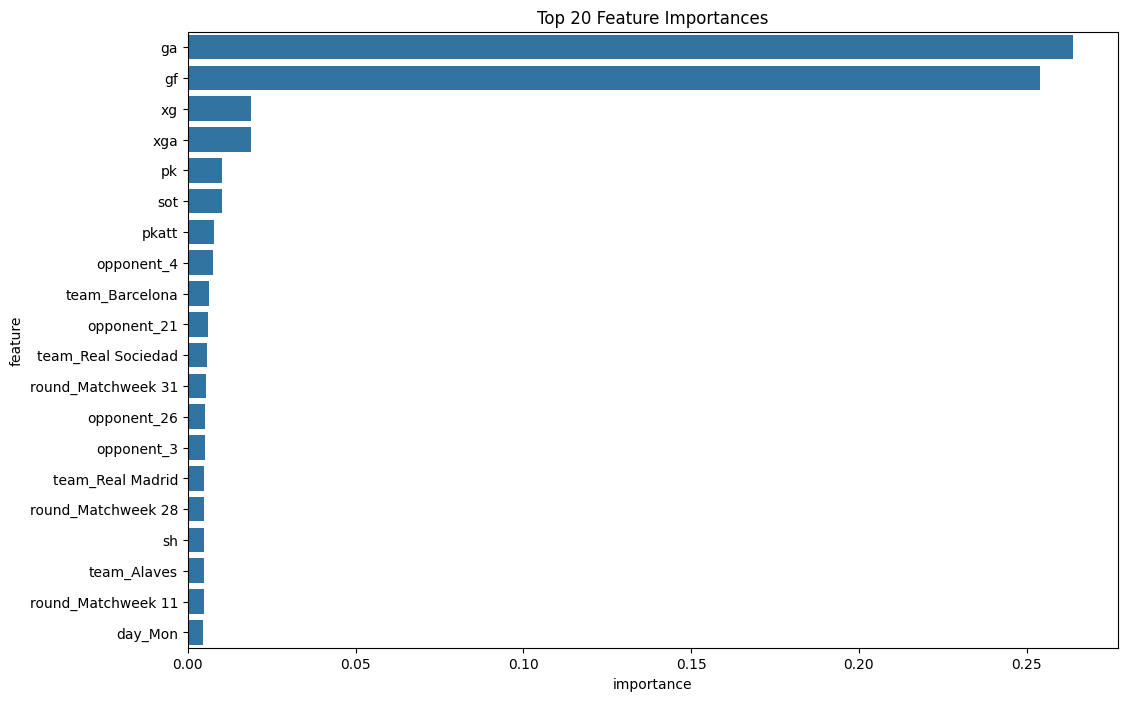

In [50]:
# Get feature names from one-hot encoder
preprocessor.fit(X_train)
onehot_columns = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_features = numeric_features + list(onehot_columns)

# Get feature importances from best model
importances = best_model.named_steps['classifier'].feature_importances_

# Create DataFrame of feature importances
feature_importances = pd.DataFrame({'feature': all_features, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

Cross-validation scores: [0.99768519 1.         1.         1.         0.9976825 ]
Mean CV accuracy: 0.9991


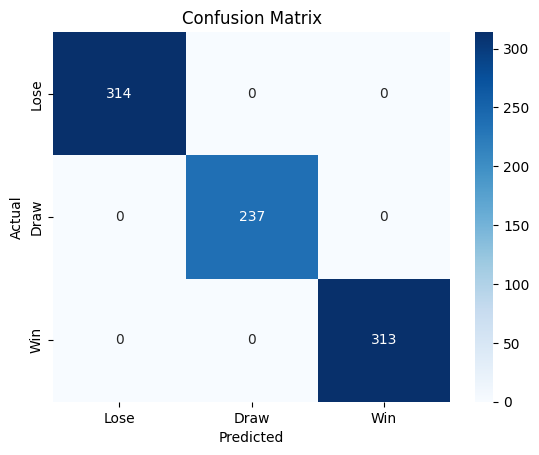

In [51]:
# Cross-validation score
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Lose', 'Draw', 'Win'], 
            yticklabels=['Lose', 'Draw', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
import joblib

# Save the model
joblib.dump(best_model, 'football_match_predictor.pkl')

# Example of loading and using the model
loaded_model = joblib.load('football_match_predictor.pkl')

# Create sample input (replace with actual values)
sample_input = pd.DataFrame({
    'comp': ['La Liga'],
    'round': ['Matchweek 1'],
    'day': ['Sat'],
    'venue': ['Home'],
    'opponent': ['Real Madrid'],
    'gf': [1.5],
    'ga': [1.0],
    'xg': [1.8],
    'xga': [1.2],
    'poss': [60],
    'attendance': [50000],
    'formation': ['4-3-3'],
    'opp formation': ['4-4-2'],
    'sh': [15],
    'sot': [5],
    'dist': [18.5],
    'fk': [1],
    'pk': [0],
    'pkatt': [0],
    'season': [2025],
    'team': ['Barcelona']
})

# Make prediction
prediction = loaded_model.predict(sample_input)
prediction_proba = loaded_model.predict_proba(sample_input)

# Map prediction back to result
result_map = {0: 'Lose', 1: 'Draw', 2: 'Win'}
print(f"Predicted result: {result_map[prediction[0]]}")
print(f"Prediction probabilities: {prediction_proba}")

Predicted result: Draw
Prediction probabilities: [[0.17381862 0.5939021  0.23227926]]


In [57]:
# Data cleaning - drop unnecessary columns
df_clean = df.drop(['Unnamed: 0', 'date', 'time', 'match report', 'notes', 'referee', 'captain'], axis=1)

# Handle missing values
numerical_cols = ['gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']
for col in numerical_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

categorical_cols = ['comp', 'round', 'day', 'venue', 'opponent', 'formation', 'opp formation', 'team']
for col in categorical_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Encode target variable
result_encoder = LabelEncoder()
y = result_encoder.fit_transform(df_clean['result'])  # Converts W/L/D to 2/1/0

# Prepare features (excluding target)
X = df_clean.drop('result', axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define feature types
numeric_features = ['gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'season']
categorical_features = ['comp', 'round', 'day', 'venue', 'opponent', 'formation', 'opp formation', 'team']

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)],
    remainder='drop')

# Define models with pipelines
models = {
    "Random Forest": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    "Logistic Regression": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    "Gradient Boosting": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier())
    ]),
    "Support Vector Machine": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC())
    ]),
    "K-Nearest Neighbors": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=20))
    ]),
    "Decision Tree": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier())
    ])
}

results_summary = {}

for name, pipeline in models.items():
    try:
        print(f"\nTraining {name}...")
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=result_encoder.classes_, output_dict=True)

        # Summarize key metrics
        results_summary[name] = {
            "Accuracy": round(accuracy, 3),
            "F1 (Win)": round(report['W']['f1-score'], 3),
            "F1 (Draw)": round(report['D']['f1-score'], 3),
            "F1 (Loss)": round(report['L']['f1-score'], 3)
        }
        
        print(f"{name} trained successfully with accuracy: {accuracy:.3f}")
    except Exception as e:
        print(f"Error training {name}: {str(e)}")

# Display summary
if results_summary:
    summary_df = pd.DataFrame(results_summary).T.sort_values(by="Accuracy", ascending=False)
    print("\nModel Performance Summary:")
    print(summary_df)
else:
    print("\nNo models were successfully trained.")

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\2170078823.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\2170078823.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method


Training Random Forest...
Random Forest trained successfully with accuracy: 0.961

Training Logistic Regression...
Logistic Regression trained successfully with accuracy: 1.000

Training Gradient Boosting...
Gradient Boosting trained successfully with accuracy: 0.998

Training Support Vector Machine...
Support Vector Machine trained successfully with accuracy: 0.995

Training K-Nearest Neighbors...
K-Nearest Neighbors trained successfully with accuracy: 0.769

Training Decision Tree...
Decision Tree trained successfully with accuracy: 0.998

Model Performance Summary:
                        Accuracy  F1 (Win)  F1 (Draw)  F1 (Loss)
Logistic Regression        1.000     1.000      1.000      1.000
Gradient Boosting          0.998     0.997      0.996      1.000
Decision Tree              0.998     1.000      0.996      0.997
Support Vector Machine     0.995     0.995      0.992      0.998
Random Forest              0.961     0.973      0.928      0.972
K-Nearest Neighbors        0.769  

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\2320382858.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




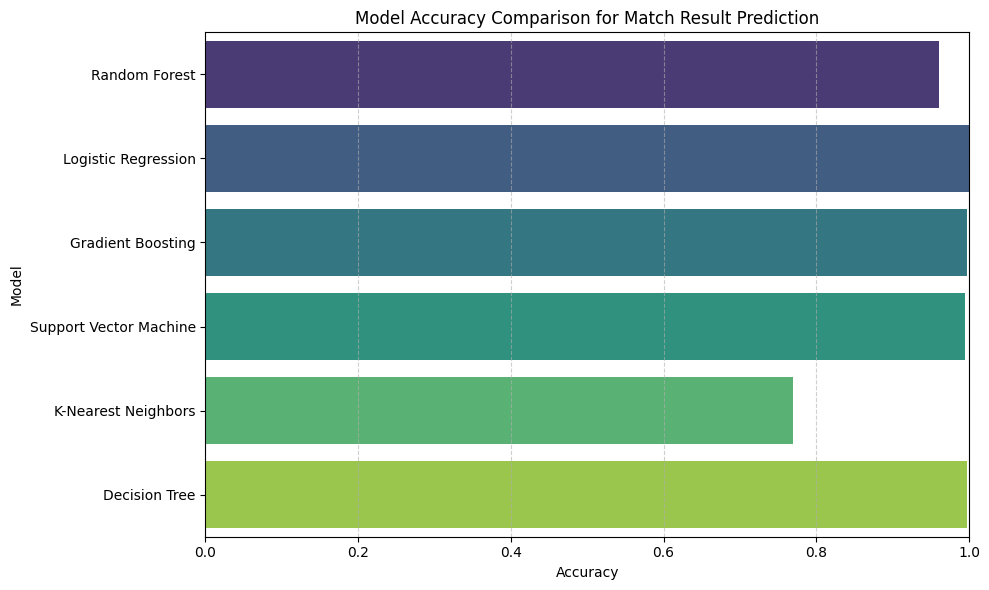

In [58]:
# Extract accuracy values
model_names = list(results_summary.keys())
accuracies = [results_summary[m]['Accuracy'] for m in model_names] 
# Plotting the accuracies as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=model_names, palette='viridis')
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy Comparison for Match Result Prediction")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# time series forecasting


In [59]:
# Prepare the data for time series prediction of 'gf' (Goals For)
df_ts = df.copy()

# Convert date to datetime and sort
df_ts['date'] = pd.to_datetime(df_ts['date'])
df_ts = df_ts.sort_values('date')

# Set date as index
df_ts.set_index('date', inplace=True)

# Resample to monthly average to smooth out match-level noise
monthly_goals = df_ts['gf'].resample('M').mean()

# Fill missing months (if any)
monthly_goals = monthly_goals.fillna(method='ffill')

# Split into train and test
train_size = int(len(monthly_goals) * 0.8)
train, test = monthly_goals[:train_size], monthly_goals[train_size:]

# Use ARIMA for time series forecasting
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (order can be tuned)
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Combine actual and forecast for comparison
forecast_df = pd.DataFrame({
    "Actual": test,
    "Forecast": forecast
})

forecast_df.head()


C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\4091671032.py:12: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\4091671032.py:15: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,Actual,Forecast
2024-02-29,1.287500,1.264207
2024-03-31,1.179487,1.260489
2024-04-30,1.359375,1.260171
2024-05-31,1.410000,1.260144
2024-06-30,1.410000,1.260141


C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\4074561290.py:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\4074561290.py:8: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



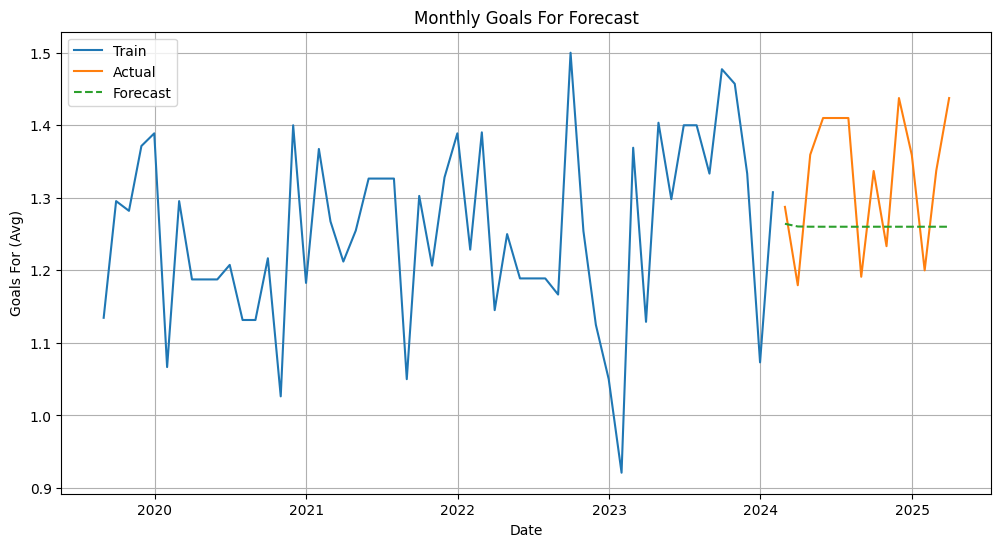

In [60]:
from statsmodels.tsa.arima.model import ARIMA

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df.set_index('date', inplace=True)

# Monthly average of 'gf' (Goals For)
monthly_goals = df['gf'].resample('M').mean().fillna(method='ffill')

# Split into train and test
train_size = int(len(monthly_goals) * 0.8)
train, test = monthly_goals[:train_size], monthly_goals[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(1, 1, 1))  # You can tune (p,d,q)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('Monthly Goals For Forecast')
plt.xlabel('Date')
plt.ylabel('Goals For (Avg)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\1469016281.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\1469016281.py:5: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_19048\1469016281.py:16: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



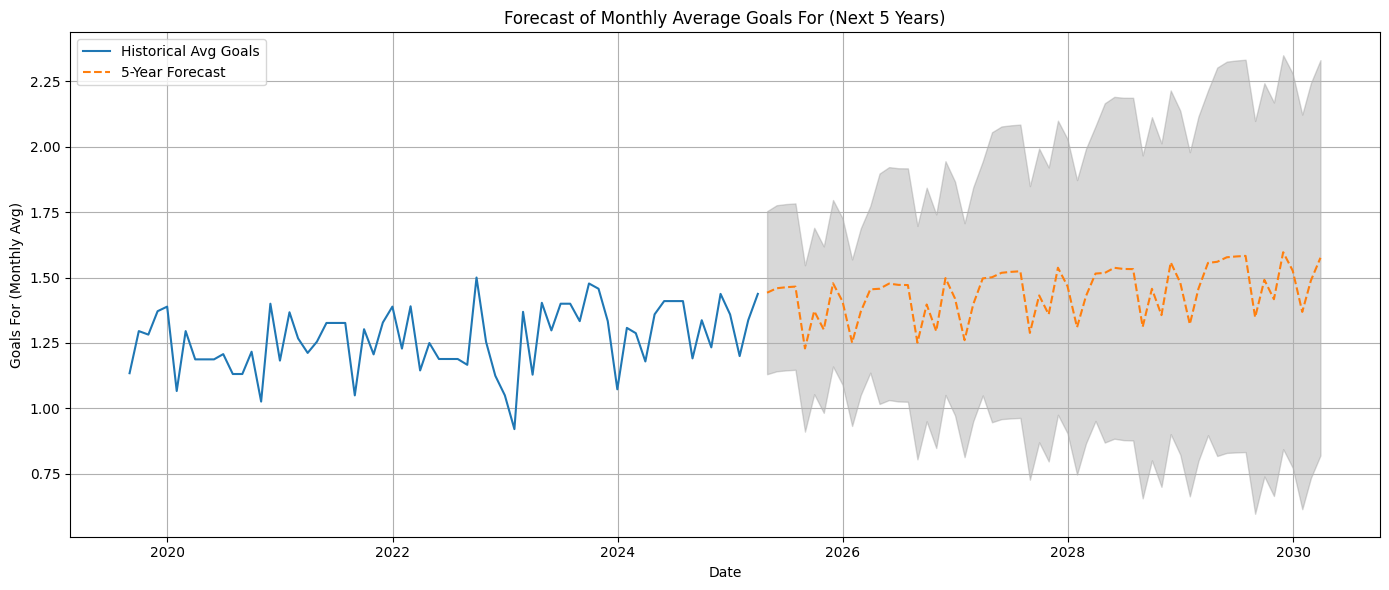

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Resample to monthly average goals
monthly_goals = df['gf'].resample('M').mean().fillna(method='ffill')

# Fit SARIMA: (p,d,q) x (P,D,Q,s)
# - p,d,q = ARIMA terms
# - P,D,Q = seasonal terms
# - s = 12 for yearly seasonality
model = SARIMAX(monthly_goals, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=False)

# Forecast for 60 months (5 years)
forecast = model_fit.get_forecast(steps=60)
forecast_index = pd.date_range(start=monthly_goals.index[-1] + pd.offsets.MonthBegin(1), periods=60, freq='M')
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot results
plt.figure(figsize=(14, 6))
plt.plot(monthly_goals, label="Historical Avg Goals")
plt.plot(forecast_index, forecast_values, label="5-Year Forecast", linestyle='--')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3)
plt.title("Forecast of Monthly Average Goals For (Next 5 Years)")
plt.xlabel("Date")
plt.ylabel("Goals For (Monthly Avg)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
# Create a DataFrame to hold the forecasted values and confidence intervals
forecast_table = pd.DataFrame({
    "Date": forecast_index,
    "Forecasted Goals": forecast_values,
    "Lower CI": conf_int.iloc[:, 0].values,
    "Upper CI": conf_int.iloc[:, 1].values
})

# Show the first few rows of the forecast table
forecast_table.head(50)


,Date,Forecasted Goals,Lower CI,Upper CI
2025-04-30,2025-04-30,1.441977,1.130757,1.753197
2025-05-31,2025-05-31,1.458911,1.141841,1.775981
2025-06-30,2025-06-30,1.462869,1.145357,1.780380
2025-07-31,2025-07-31,1.465351,1.147700,1.783002
2025-08-31,2025-08-31,1.229120,0.911415,1.546824
2025-09-30,2025-09-30,1.372128,1.054357,1.689898
2025-10-31,2025-10-31,1.301054,0.983218,1.618889
2025-11-30,2025-11-30,1.478127,1.160227,1.796027
2025-12-31,2025-12-31,1.408308,1.090342,1.726273
2026-01-31,2026-01-31,1.251141,0.933112,1.569171
